# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Craig Wilcox

### Repository Link: https://github.com/s256657/article-summarizer

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### Pre-work Import Requirements

In [17]:
import pickle
import requests
import spacy
import spacytextblob
from spacytextblob.spacytextblob import SpacyTextBlob
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import json
from textblob import TextBlob
from collections import Counter

!pip list

print('All prereqs installed.')

Python(44195) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Package                 Version
----------------------- -----------
annotated-types         0.7.0
appnope                 0.1.4
asttokens               3.0.0
beautifulsoup4          4.13.4
blis                    1.3.0
catalogue               2.0.10
certifi                 2025.8.3
charset-normalizer      3.4.2
click                   8.2.1
cloudpathlib            0.21.1
comm                    0.2.3
confection              0.1.5
contourpy               1.3.3
cycler                  0.12.1
cymem                   2.0.11
debugpy                 1.8.15
decorator               5.2.1
en_core_web_sm          3.8.0
executing               2.2.0
fonttools               4.59.0
idna                    3.10
ipykernel               6.30.1
ipython                 9.4.0
ipython_pygments_lexers 1.1.1
jedi                    0.19.2
Jinja2                  3.1.6
joblib                  1.5.1
jupyter_client          8.6.3
jupyter_core            5.8.1
kiwisolver              1.4.8
langcodes            

#### 1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [13]:

url = "https://www.simplilearn.com/future-of-data-analyst-article"
response = requests.get(url)
response.raise_for_status()  # ensures the request succeeded

with open("article.html", "w", encoding="utf-8") as f:
    f.write(response.text)

print("HTML saved to article.html")

HTML saved to article.html


#### 2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [14]:
# Step 1: Load the HTML file
with open("article.html", "r", encoding="utf-8") as file:
    html = file.read()

# Step 2: Extract plain text using BeautifulSoup
soup = BeautifulSoup(html, "html.parser")
text = soup.get_text()

# Step 3: Analyze the sentiment of the text
blob = TextBlob(text)
polarity = blob.sentiment.polarity

# Step 4: Count the number of sentences
num_sentences = len(blob.sentences)

# Output results
print(f"Polarity Score: {polarity}")
print(f"Number of Sentences: {num_sentences}")

Polarity Score: 0.1552297204220281
Number of Sentences: 158


#### 3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [15]:
def main():
    # Read the full article text from file
    with open("article.html", "r", encoding="utf-8") as file:
        text = file.read()

    # Load spaCy model, disable parser and ner for speed if text is large
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

    # Process the text with spaCy pipeline
    doc = nlp(text)

    # Extract tokens: lowercase, skip stopwords, punctuation, non-alpha tokens
    tokens = [
        token.text.lower()
        for token in doc
        if not token.is_stop and not token.is_punct and token.is_alpha
    ]

    # Count token frequencies
    token_freq = Counter(tokens)

    # Get the top 5 most common tokens
    most_common = token_freq.most_common(5)

    # Print results with labels
    print("Top 5 Most Frequent Tokens:")
    for i, (token, freq) in enumerate(most_common, start=1):
        print(f"{i}. Token: '{token}' — Frequency: {freq}")

if __name__ == "__main__":
    main()

Top 5 Most Frequent Tokens:
1. Token: 'data' — Frequency: 956
2. Token: 'menu' — Frequency: 866
3. Token: 'program' — Frequency: 300
4. Token: 'analytics' — Frequency: 287
5. Token: 'list' — Frequency: 264


#### 4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [16]:
def main():
    # Load and parse HTML text
    with open("article.html", "r", encoding="utf-8") as file:
        html = file.read()

    soup = BeautifulSoup(html, "html.parser")
    text = soup.get_text()

    # Load spaCy English model (small)
    nlp = spacy.load("en_core_web_sm")

    # Process text with spaCy pipeline
    doc = nlp(text)

    # Extract lemmas, lowercase, filter out stopwords, punctuation, non-alpha
    lemmas = [
        token.lemma_.lower()
        for token in doc
        if not token.is_stop and not token.is_punct and token.is_alpha
    ]

    # Count lemma frequencies
    lemma_freq = Counter(lemmas)

    # Get top 5 most common lemmas
    most_common_lemmas = lemma_freq.most_common(5)

    # Print results with labels
    print("Top 5 Most Frequent Lemmas:\n")
    for i, (lemma, freq) in enumerate(most_common_lemmas, start=1):
        print(f"{i}. Lemma: '{lemma}' — Frequency: {freq}")

if __name__ == "__main__":
    main()

Top 5 Most Frequent Lemmas:

1. Lemma: 'data' — Frequency: 98
2. Lemma: 'datum' — Frequency: 92
3. Lemma: 'analyst' — Frequency: 56
4. Lemma: 'analytic' — Frequency: 38
5. Lemma: 'certification' — Frequency: 28


#### 5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

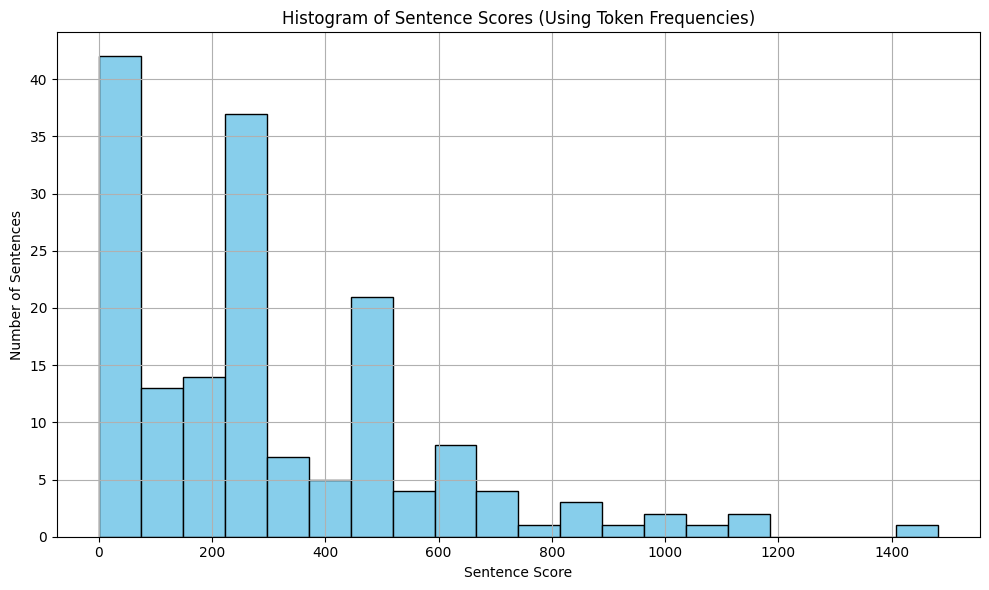

In [ ]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Read and extract text from HTML
with open("article.html", "r", encoding="utf-8") as file:
    soup = BeautifulSoup(file.read(), "html.parser")
    text = soup.get_text()

# Process entire article
doc = nlp(text)

# Get token frequency across entire article
tokens = [
    token.text.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and token.is_alpha
]
token_freq = Counter(tokens)

# Score each sentence using token frequencies
sentence_scores = []
for sent in doc.sents:
    sent_score = sum(
        token_freq[token.text.lower()]
        for token in sent
        if not token.is_stop and not token.is_punct and token.is_alpha
    )
    sentence_scores.append(sent_score)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of Sentence Scores (Using Token Frequencies)")
plt.xlabel("Sentence Score")
plt.ylabel("Number of Sentences")
plt.grid(True)
plt.tight_layout()
plt.show()

# Based on the histogram my observations show the most common scores are all below 300 with a spike right at 300.

#### 6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

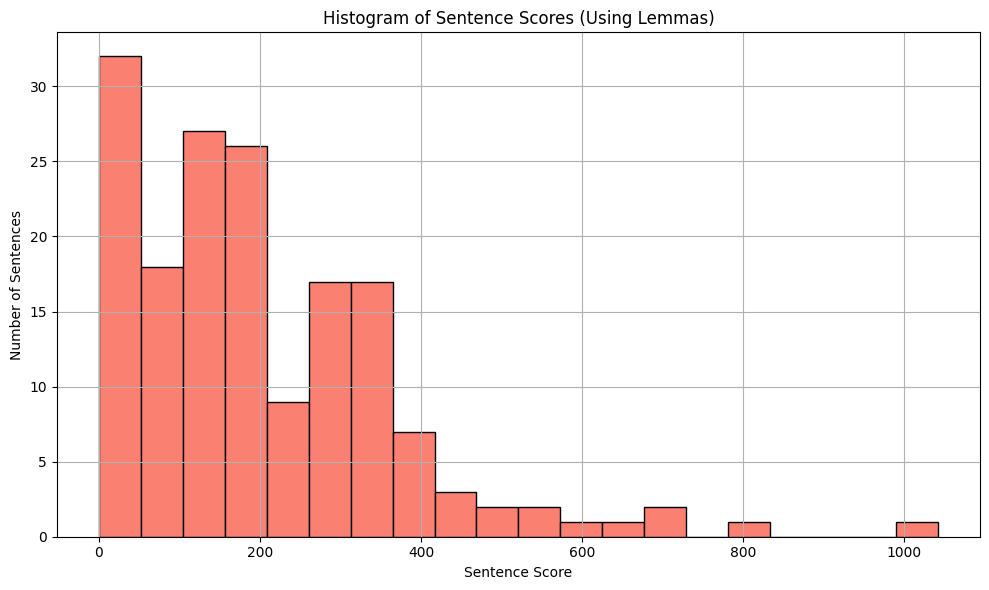

In [ ]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Read and extract text from HTML
with open("article.html", "r", encoding="utf-8") as file:
    soup = BeautifulSoup(file.read(), "html.parser")
    text = soup.get_text()

# Process article text
doc = nlp(text)

# Count lemma frequencies across the article (lowercased, filtered)
lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and token.is_alpha
]
lemma_freq = Counter(lemmas)

# Score each sentence based on lemma frequencies
sentence_lemma_scores = []
for sent in doc.sents:
    score = sum(
        lemma_freq[token.lemma_.lower()]
        for token in sent
        if not token.is_stop and not token.is_punct and token.is_alpha
    )
    sentence_lemma_scores.append(score)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(sentence_lemma_scores, bins=20, color='salmon', edgecolor='black')
plt.title("Histogram of Sentence Scores (Using Lemmas)")
plt.xlabel("Sentence Score")
plt.ylabel("Number of Sentences")
plt.grid(True)
plt.tight_layout()
plt.show()

# The most common range of scores are between 100 and 200

#### 7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 250
* Cutoff Score (lemmas): 200

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

#### 8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [ ]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Read HTML and extract text
with open("article.html", "r", encoding="utf-8") as file:
    soup = BeautifulSoup(file.read(), "html.parser")
    text = soup.get_text()

# Process text
doc = nlp(text)

# Compute token frequencies
tokens = [
    token.text.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and token.is_alpha
]
token_freq = Counter(tokens)

# Score each sentence using token frequencies
sentence_scores = []
for sent in doc.sents:
    score = sum(
        token_freq[token.text.lower()]
        for token in sent
        if not token.is_stop and not token.is_punct and token.is_alpha
    )
    sentence_scores.append(score)

# ----- SET YOUR CUTOFF HERE -----
token_cutoff = 250

# Create a summary by including sentences above the cutoff
summary_sentences = [
    sent.text.strip()
    for sent, score in zip(doc.sents, sentence_scores)
    if score > token_cutoff
]

# Join and print summary
summary = ' '.join(summary_sentences)
print("Token-Based Summary:\n")
print(summary)

Token-Based Summary:

DataCareer Fast-trackEnterpriseOther SegmentsArticlesEbooksFree Practice TestsOn-demand WebinarsTutorialsExplore our curated learning milestones for you!Click here to close suggestions!HomeResourcesData Science & Business AnalyticsFuture of Data Analyst: Trends & Career Paths!Table of ContentsEvolving Role as Data AnalystImportance of Data AnalystWhere Is Data Analytics Going?Career as a Data AnalystLatest Trend in Data AnalyticsCareer Boost Opportunities as Data AnalystConclusionFAQsFuture of Data Analyst: Trends & Career Paths!By SimplilearnShare This Article:Last updated on Jul 31, 2025Table of ContentsEvolving Role as Data AnalystImportance of Data AnalystWhere Is Data Analytics Going?Career as a Data AnalystLatest Trend in Data AnalyticsCareer Boost Opportunities as Data AnalystConclusionFAQs Data is essential for decision-making in every sector. The massive amount of data generated constantly requires skilled analysis to turn it into useful insights, making 

#### 9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [27]:
# Generate summary (this assumes your previous summary code already exists)
summary = ' '.join(summary_sentences)

# Analyze summary polarity
blob = TextBlob(summary)
polarity = blob.sentiment.polarity

# Count number of sentences in the summary
summary_sentence_count = len(summary_sentences)

# Print results
print("🧠 Polarity score of token-based summary:", polarity)
print("🧾 Number of sentences in summary:", summary_sentence_count)

🧠 Polarity score of token-based summary: 0.1145895934131228
🧾 Number of sentences in summary: 53


#### 10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [28]:
nlp = spacy.load("en_core_web_sm")

# Read HTML and extract text
with open("article.html", "r", encoding="utf-8") as file:
    soup = BeautifulSoup(file.read(), "html.parser")
    text = soup.get_text()

# Process text
doc = nlp(text)

# Compute lemma frequencies
lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and token.is_alpha
]
lemma_freq = Counter(lemmas)

# Score each sentence using lemma frequencies
lemma_scores = []
for sent in doc.sents:
    score = sum(
        lemma_freq[token.lemma_.lower()]
        for token in sent
        if not token.is_stop and not token.is_punct and token.is_alpha
    )
    lemma_scores.append(score)

# ----- SET YOUR LEMMA CUTOFF SCORE -----
lemma_cutoff = 200

# Create lemma-based summary
lemma_summary_sentences = [
    sent.text.strip()
    for sent, score in zip(doc.sents, lemma_scores)
    if score > lemma_cutoff
]

# Join and print summary
lemma_summary = ' '.join(lemma_summary_sentences)
print("📝 Lemma-Based Summary:\n")
print(lemma_summary)

📝 Lemma-Based Summary:

DataCareer Fast-trackEnterpriseOther SegmentsArticlesEbooksFree Practice TestsOn-demand WebinarsTutorialsExplore our curated learning milestones for you!Click here to close suggestions!HomeResourcesData Science & Business AnalyticsFuture of Data Analyst: Trends & Career Paths!Table of ContentsEvolving Role as Data AnalystImportance of Data AnalystWhere Is Data Analytics Going?Career as a Data AnalystLatest Trend in Data AnalyticsCareer Boost Opportunities as Data AnalystConclusionFAQsFuture of Data Analyst: Trends & Career Paths!By SimplilearnShare This Article:Last updated on Jul 31, 2025Table of ContentsEvolving Role as Data AnalystImportance of Data AnalystWhere Is Data Analytics Going?Career as a Data AnalystLatest Trend in Data AnalyticsCareer Boost Opportunities as Data AnalystConclusionFAQs Data is essential for decision-making in every sector. The massive amount of data generated constantly requires skilled analysis to turn it into useful insights, makin

#### 11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [29]:
# Join the summary into a single string
lemma_summary = ' '.join(lemma_summary_sentences)

# Calculate polarity using TextBlob
blob = TextBlob(lemma_summary)
polarity = blob.sentiment.polarity

# Count number of sentences in the summary
num_sentences = len(lemma_summary_sentences)

# Print results
print("🧠 Polarity score of lemma-based summary:", polarity)
print("🧾 Number of sentences in lemma-based summary:", num_sentences)

🧠 Polarity score of lemma-based summary: 0.13610510822510816
🧾 Number of sentences in lemma-based summary: 65


#### 12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

There is a difference which is to be expected mostly because summarys always remove content much of that is emotionally driven because the tokens and lemmas are driving the summary content as the most common when in this article is subject based not emotionally based.

#### 13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

The token based summary is better and I think the reasoning is pretty simple as it grabbed more pertinant words in the article after reading.